In [1]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename:
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        # print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


# print(X_train)
# print(len(y_train))
# print(X_test)
# print(len(y_test))



3406
1704


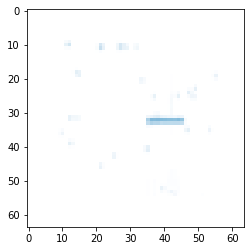

In [5]:
import matplotlib.pyplot as plt
# Reshape
X_train = X_train.reshape((len(X_train),64, 64,4))
X_test = X_test.reshape((len(X_test),64, 64,4)) 
# show
image = X_train[1]
plt.imshow(image)
plt.show()

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(64, 64, 4)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=10),
             model_checkpoint_callback,

]

In [19]:
history = model.fit(X_train,y_train, epochs=500,validation_data=(X_test,y_test),
                    callbacks=callbacks
                    )

Epoch 1/500
74/74 [==============================] - 12s 166ms/step - loss: 0.2305 - accuracy: 0.9038 - val_loss: 393.5480 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/500
74/74 [==============================] - 12s 157ms/step - loss: 0.2242 - accuracy: 0.9033 - val_loss: 781.2286 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 3/500
74/74 [==============================] - 12s 165ms/step - loss: 0.2168 - accuracy: 0.8986 - val_loss: 648.7202 - val_accuracy: 0.3449
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 4/500
74/74 [==============================] - 22s 303ms/step - loss: 0.2477 - accuracy: 0.8884 - val_loss: 408.6088 - val_accuracy: 0.3449
Epoch 5/500
74/74 [==============================] - 20s 266ms/step - loss: 0.2147 - accuracy: 0.9046 - val_loss: 308.7526 - val_accuracy: 0.0000e+00
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 6/500
74/74 [=======

In [20]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Accuracy on test dataset:', accuracy)

37/37 [==============================] - 2s 54ms/step - loss: 188.8897 - accuracy: 0.0000e+00
Accuracy on test dataset: 0.0


In [21]:
predictions = model.predict(X_test)

In [22]:
import numpy as np

In [23]:
np.argmax(model.predict(X_test[60].reshape(1,64,64,4)), axis=-1)

array([3])

In [24]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

In [25]:
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,0.230503,0.903764,393.548035,0.000000
1,0.224180,0.903336,781.228577,0.000000
2,0.216801,0.898631,648.720154,0.344945
3,0.247691,0.888366,408.608765,0.344945
4,0.214655,0.904619,308.752625,0.000000
5,0.207465,0.914457,127.877563,0.344945
6,0.203437,0.911035,0.618779,0.777400
7,0.208198,0.906758,68.554733,0.344945
8,0.503595,0.788281,769.702209,0.000000
9,0.369110,0.829341,816.802734,0.000000


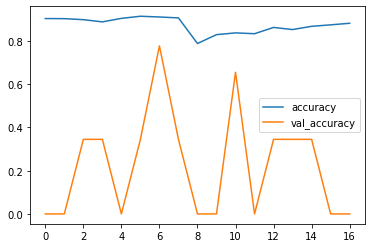

In [26]:
metrics_df[["accuracy","val_accuracy"]].plot();